## 평가지표
- 데이터 이해 및 탐색

    각 피처에 대한 이해가 명확한가?       
    데이터의 분포와 특성을 파악하기 위한 적절한 시각화가 이루어졌는가?       
    데이터에서 유의미한 인사이트를 도출하였는가?(심화)       

- 데이터 전처리 과정

    결측치 처리, 이상치 처리 등 데이터 정제가 적절하게 수행되었는가?       
    데이터 스케일링 및 인코딩 등이 적절히 수행되었는가?       
    피처 엔지니어링(파생 변수)이 적절하고 창의적으로 이루어졌는가?(심화)       

- 모델 선택 및 비교

    최소 3개 이상의 모델을 비교하고 있는가?       
    모델 선택 이유와 각 모델의 특성을 잘 설명하였는가?       
    앙상블(모델 3개) 방법을 사용하여, 성능을 비교하였는가? (심화)       

- 성능 평가

    검정 데이터에 대한 평가 지표가 명확하게 제시되었는가?       
    평가 지표가 타당하며, 모델 성능을 잘 반영하는가?       
    하이퍼파라미터 튜닝(실험)을 진행하고, 결과를 기록했는가?(심화)       

#### set-ups

In [1]:
!pip install -U scikit-learn==1.4.2 imbalanced-learn==0.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [2]:
# import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
# load data

train = pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/train.csv")

In [4]:
test = pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/test.csv")

In [5]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,170883,120396.0,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,-2.277774,0.310404,-1.211770,-0.805137,-0.503570,1.154627,0.260146,-2.558533,0.876103,0.902372,0.422115,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,124.98
1,170884,120396.0,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,0.529802,0.776728,-0.864413,0.060070,-1.102005,-1.195983,-1.860611,-1.959586,0.448597,2.480298,0.527285,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,50.00
2,170885,120396.0,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,-0.648266,0.376802,-0.046308,0.167851,0.095213,0.621540,0.065680,-0.081217,-0.895254,1.031398,0.843741,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,8.69
3,170886,120396.0,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,-0.041604,-0.694289,-0.806051,0.277925,0.343193,-0.268240,-0.927519,0.153715,-0.885167,-1.040416,-1.133255,-0.251346,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705,59.99
4,170887,120396.0,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,-0.634128,0.975375,0.226406,0.744480,0.852910,0.083724,-0.606380,-1.144119,-0.580166,1.559673,-0.343759,-0.293448,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475,119.97


In [7]:
# 170882 를 기점으로 그 뒤 시점으로 자름 
# => test set과 train set 나누는 기준이 id 순서 였나 봉가, 제대로 되었는지 확인을 한 듯함

train["id"].max(), test["id"].min()

(170882, 170883)

In [8]:
print(len(train), len(test))
len(train)/(len(train) + len(test))

170883 113923


0.5999978933028096

## EDA & Data Preprocessing 

- ID 당 여러 거래 중 사기 거래를 측정한 것이 아니라, 사기거래,정상거래를 무작위 추출한 데이터로 추측됨           
  => ID당 1개의 사기 또는 정상 거래로 이루어진 데이터      
  => 중복값 또한 없음      
  => Time 컬럼의 자료값은 0 ~ 120396 사이의 실수로 데이터세의 첫 거래 사이의 경과시간(초) => 삭제 예정
  => ID는 관련이 없으므로 삭제 예정 
- 사기거래 데이터가 0.21%로 레이블 값이 매우 불균형한 형태의 데이터
- 결측치는 없으며, Class/Id 레이블만 정수형 나머지는 실수형 데이터
- 상관관계분석을 통해 V14와 V17이 Class 레이블과 음의 상관관계가 높음 => 관련 이상치 확인 후 제거 예정

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [10]:
train.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,85441.000000,61091.567090,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,0.018887,-0.029860,0.192931,-0.097563,0.064948,0.082161,0.133121,-0.007633,0.041929,-0.050953,-0.019295,0.030951,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704,0.002107
std,49329.817362,27828.109419,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,1.152284,1.096870,1.047129,1.143030,1.048403,0.978313,0.950533,0.882970,0.912961,0.834891,0.812640,0.725834,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429,0.045851
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.049895,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-22.838548,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42720.500000,41216.500000,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,-0.660083,-0.519237,-0.565404,-0.509487,-0.626833,-0.336870,-0.449761,-0.470979,-0.417753,-0.524206,-0.497651,-0.183583,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000,0.000000
50%,85441.000000,60776.000000,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,-0.078963,-0.111448,0.119980,0.110904,0.031907,0.093021,0.244211,0.063845,-0.018106,-0.052349,-0.022296,-0.036160,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000,0.000000
75%,128161.500000,78622.000000,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,0.641358,0.408345,0.999152,0.617389,0.743255,0.528002,0.828286,0.527882,0.435482,0.432105,0.467626,0.155777,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000,0.000000
max,170882.000000,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [11]:
train["Class"].value_counts(normalize=True)*100

Class
0    99.78933
1     0.21067
Name: proportion, dtype: float64

In [12]:
train[train['Class'] == 1].groupby('id')['Amount'].count()

id
541       1
623       1
4920      1
6108      1
6329      1
         ..
157918    1
163149    1
163586    1
167184    1
167305    1
Name: Amount, Length: 360, dtype: int64

In [13]:
train.groupby('id')['Amount'].count()

id
0         1
1         1
2         1
3         1
4         1
         ..
170878    1
170879    1
170880    1
170881    1
170882    1
Name: Amount, Length: 170883, dtype: int64

In [14]:
# 중복값 확인
train[train.duplicated() == 1]

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


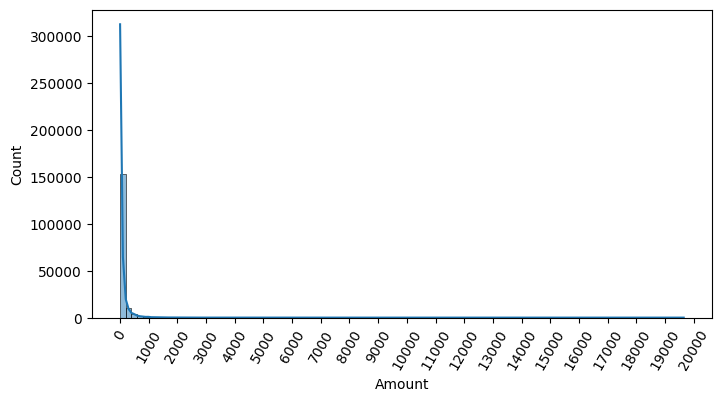

In [15]:
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(train['Amount'], bins=100, kde=True)
plt.show()

<Axes: >

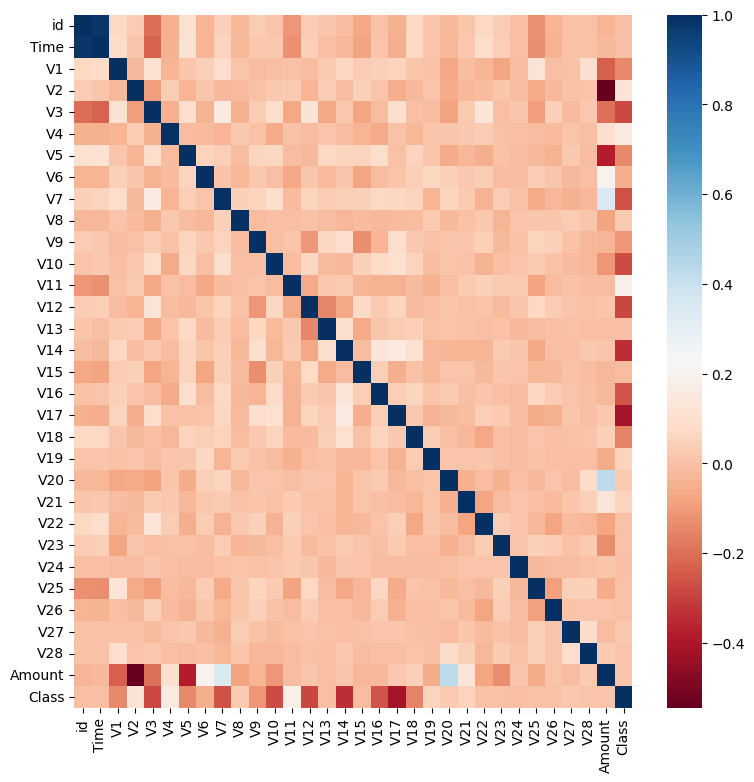

In [16]:
# 이상치 판별
# 결정값과 가장 상관성이 높은 피처들 위주로 이상치 검출 => Class와 음의 상관관계 높은 V14 & V17
plt.figure(figsize=(9, 9))
corr = train.corr()
sns.heatmap(corr, cmap='RdBu')

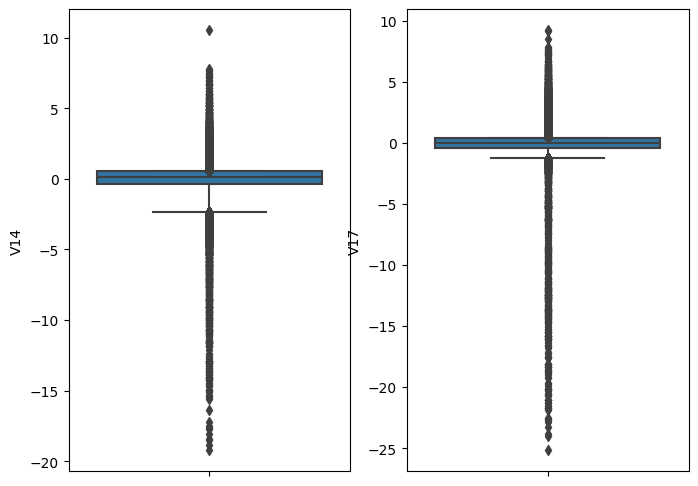

In [17]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train['V14'], whis=[1.5, 1.5])
plt.subplot(1, 2, 2)
sns.boxplot(y=train['V17'], whis=[1.5, 1.5])

plt.show()

In [18]:
# 정상거래 데이터 중 IQR을 이용한 이상치 데이터(IQR 1.5배 생성된 범위를 이용해 최대최소결정 후)판별

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df["Class"]==1][column]
    quantile_25 = np.percentile(fraud.values, 25) # 1분위수
    quantile_75 = np.percentile(fraud.values, 75) # 3분위수
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight # 최솟값
    highest_val = quantile_75 + iqr_weight # 최대값

    #정상거래 데이터 중 최대값보다 크거나 최소값보다 작은 데이터의 인덱스
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index 
    return outlier_index

In [19]:
"""인자로 받은 DataFrame을 복사한 후 amount는 로그스케일링 한 후 Time과 스케일링 하지 않은 Amount컬럼 삭제
V14 컬럼의 이상치를 탐지하고 제거한 후 데이터 프레임을 반환"""

def get_preprocessed_df(df=None, train=True):
    # DataFrame 복제
    df_copy = df.copy()
    # Amount 로그 스케일링 후 Amount_Scaled라는 컬럼명으로 제일 앞에 삽입
    amount_n = np.log1p(df_copy["Amount"]) # Amount Scaling
    df_copy.insert(0, "Amount_Scaled", amount_n)
    # Time 컬럼과 스케일링 하지 않음 Amount 컬럼 삭제
    df_copy.drop(["Time", "Amount", 'id'], axis=1, inplace=True) # delete useless data

    # V14컬럼의 이상치 탐지 후 제거
    outlier_index = get_outlier(df=df_copy, column="V14", weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    
    return df_copy

In [20]:
"""데이터 전처리 후 타겟과 피쳐로 데이터 분리후
학습데이터셋과 테스트데이터 셋으로 분리 - 원본 데이터의 레이블 분포 고려됨(stratify)

"""
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                        test_size=0.3, 
                                                        random_state=0, 
                                                        stratify=y_target)
    
    return X_train, X_test, y_train, y_test


In [21]:
# 평가 함수

def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision: .4f}, 재현율: {recall: .4f}, f1스코어: {f1:.4f}, roc-auc: {roc_auc:.4f}")

In [22]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행 후 평가. 
# 최종적으로 평가가 출력됨

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    """
    model : 학습 및 평가할 머신러닝 모델 객체
    ftr_train : 학습용 feature data
    ftr_test : 테스트용 feature data
    tgt_train : 학습용 target data
    tgt_test : 테스트용 target data
    """
    
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [23]:
def get_model_train_eval_early_stopping(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    """
    model : 학습 및 평가할 머신러닝 모델 객체
    ftr_train : 학습용 feature data
    ftr_test : 테스트용 feature data
    tgt_train : 학습용 target data
    tgt_test : 테스트용 target data
    """
    eval_s=[(ftr_train, tgt_train), (ftr_test, tgt_test)]
    model.fit(ftr_train, tgt_train, eval_set = eval_s ) #verbose = False
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [24]:
# 데이터 전처리 후, feature/label 분리 후 train/test 셋 분리
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

In [25]:
# stratify 적용 했기 때문에 원본 데이터의 라벨의 분포 고려되어 나뉨
print("학습 데이터 레이블 값 비율")
print(y_train.value_counts()/y_train.shape[0] * 100)
print()
print("테스트 데이터 레이블 값 비율")
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.790998
1     0.209002
Name: count, dtype: float64

테스트 데이터 레이블 값 비율
Class
0    99.791277
1     0.208723
Name: count, dtype: float64


In [26]:
smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [27]:
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ", X_train.shape, y_train.shape)
print("\nSMOTE 적용 후 학습용 피처/레이블 데이터 세트: ", X_train_over.shape, y_train_over.shape)
print("\nSMOTE 적용 후 레이블 값 분포: \n", pd.Series(y_train_over).value_counts(normalize=True))

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (119616, 29) (119616,)

SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (238732, 29) (238732,)

SMOTE 적용 후 레이블 값 분포: 
 Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [28]:
# 모델객체생성
lr_clf = LogisticRegression(max_iter=1000, C=10)

lgbm_clf = LGBMClassifier(n_estimators=500, 
                          num_leaves=32, 
                          n_jobs=-1, 
                          early_stop_round = 10,
                          metric='auc',
                          boost_from_average=False,
                          verbose=-1
                         )
xgb_clf = XGBClassifier(n_estimators=500, 
                        learning_rate=0.05, 
                        early_stopping_rounds=10, 
                        eval_metric='auc',
                        verbose=False
                       )
knn_clf  = KNeighborsClassifier(n_neighbors=5)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

In [29]:
lgbm_clf = LGBMClassifier(n_estimators=1000, 
                          num_leaves=64, 
                          n_jobs=-1, 
                          boost_from_average=False,
                          verbose=-1
                         )

In [30]:
get_model_train_eval(model = lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[51146    11]
 [   15    92]]
정확도: 0.9995, 정밀도:  0.8932, 재현율:  0.8598, f1스코어: 0.8762, roc-auc: 0.9817


- 파라미터튜닝 없이 학습 했을 경우
- 
| 모델명 (Model)          | 정확도 (Accuracy) | 정밀도 (Precision) | 재현율 (Recall) | f1스코어 (F1-score) | roc-auc | 비고 (Notes) |
|-------------------------|-------------------|--------------------|-----------------|---------------------|---------|--------------|
|Logistic Regression| 0.999| 0.8481| 0.6262| 0.7204| 0.9666  |              |
| lightGBM | 0.9995 | 0.8932 | 0.8598 | 0.8762 | 0.9821  |              |
| XGBoost | 0.9919 | 0.192 | 0.8972 | 0.3163 | 0.9856  |              |
| XGBoost | 0.9890 | 0.1464 | 0.8879 | 0.2513 | 0.9856  | L1 규제적용    |
| KNN  | 0.9981 | 0.9101 | 0.7570 | 0.8265 | 0.9251  |  n_neighbors=4       |
| AdaBoost classifier| 0.9938 | 0.2343 | 0.8692| 0.369 | 0.9586  |              |

In [31]:
get_model_train_eval(model = lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[51145    12]
 [   40    67]]
정확도: 0.9990, 정밀도:  0.8481, 재현율:  0.6262, f1스코어: 0.7204, roc-auc: 0.9648


In [32]:
get_model_train_eval_early_stopping(model = lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[51146    11]
 [   15    92]]
정확도: 0.9995, 정밀도:  0.8932, 재현율:  0.8598, f1스코어: 0.8762, roc-auc: 0.9817


In [33]:
get_model_train_eval_early_stopping(model = xgb_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

[0]	validation_0-auc:0.98946	validation_1-auc:0.97940
[1]	validation_0-auc:0.99430	validation_1-auc:0.97716
[2]	validation_0-auc:0.99492	validation_1-auc:0.97774
[3]	validation_0-auc:0.99532	validation_1-auc:0.97623
[4]	validation_0-auc:0.99572	validation_1-auc:0.97685
[5]	validation_0-auc:0.99610	validation_1-auc:0.97697
[6]	validation_0-auc:0.99637	validation_1-auc:0.97559
[7]	validation_0-auc:0.99665	validation_1-auc:0.97505
[8]	validation_0-auc:0.99698	validation_1-auc:0.98209
[9]	validation_0-auc:0.99715	validation_1-auc:0.98118
[10]	validation_0-auc:0.99722	validation_1-auc:0.98018
[11]	validation_0-auc:0.99739	validation_1-auc:0.98199
[12]	validation_0-auc:0.99756	validation_1-auc:0.98176
[13]	validation_0-auc:0.99773	validation_1-auc:0.98205
[14]	validation_0-auc:0.99783	validation_1-auc:0.98174
[15]	validation_0-auc:0.99789	validation_1-auc:0.98116
[16]	validation_0-auc:0.99797	validation_1-auc:0.98133
[17]	validation_0-auc:0.99808	validation_1-auc:0.98124
[18]	validation_0-au

In [34]:
get_model_train_eval(model = knn_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[51053   104]
 [   15    92]]
정확도: 0.9977, 정밀도:  0.4694, 재현율:  0.8598, f1스코어: 0.6073, roc-auc: 0.9341


In [35]:
get_model_train_eval(model = ada_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[50555   602]
 [   12    95]]
정확도: 0.9880, 정밀도:  0.1363, 재현율:  0.8879, f1스코어: 0.2363, roc-auc: 0.9653


#### HyperParameter Tuning - lightGBM

best: {'colsample_bytree': 0.8186397078336126, 'learning_rate': 1.0747138879958187, 'max_depth': 2, 'min_child_samples': 37, 'min_child_weight': 4.845650435487709, 'num_leaves': 143, 'subsample': 0.8660429664315832, 'subsample_freq': 1}      
=> 정확도: 0.9840, 정밀도:  0.1078, 재현율:  0.9159, f1스코어: 0.1929, roc-auc: 0.9831      

In [36]:
# 1. 하이퍼 파라미터 검색공간설정
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
params = {
    'num_leaves': hp.randint('num_leaves', 20, 150),          # 하나의 트리가 가질 수 있는 최대 리프 노드 수 (디폴트: 31, 일반적인 탐색 범위: 20~150)
    'max_depth': hp.choice('max_depth', [-1, 5, 10, 15]),    # 트리의 최대 깊이 (디폴트: -1, 제한 없음, 일반적인 탐색 옵션: 5, 10, 15)
    'learning_rate': hp.loguniform('learning_rate', 0.0067, 0.37),  # 학습률 (디폴트: 0.1, 일반적인 탐색 범위: 0.0067 ~ 0.37)
    'min_child_weight': hp.loguniform('min_child_weight', 0.002, 20), # 자식 노드에 필요한 최소 가중치 합 (디폴트: 0.001, 일반적인 탐색 범위: 0.002 ~ 20)
    'min_child_samples': hp.randint('min_child_samples', 10, 100), # 자식 노드에 필요한 최소 데이터 수 (디폴트: 20, 일반적인 탐색 범위: 10~100)
    'subsample': hp.uniform('subsample', 0.7, 1.0),          # 학습 데이터 샘플링 비율 (디폴트: 1.0, 일반적인 탐색 범위: 0.7~1.0)
    'subsample_freq': hp.choice('subsample_freq', [0, 1]),    # subsample 빈도 (디폴트: 0, 옵션: 1 - 매 트리마다 subsample)
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0), # 각 트리 생성 시 컬럼 샘플링 비율 (디폴트: 1.0, 일반적인 탐색 범위: 0.6~1.0)
          }

In [37]:
# ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

# 2. 목적 함수 설정 - early_stopping 사용
def objective_func(search_space):
    model = LGBMClassifier(n_estimators=1000, # early_stopping을 고려하여 충분히 큰 n_estimators 설정
                            **search_space,
                            n_jobs=-1,
                            importance_type='split',
                            early_stopping_round=100, # 성능 향상 없는 100라운드 동안 학습 중단
                            metric='f1',
                           boost_from_average=False,
                            verbose = -1
                            )
    
    from sklearn.model_selection import cross_val_score, StratifiedKFold
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # StratifiedKFold 설정 ; 회귀는 KFold(n_splits=3)

    scores = []
    for train_index, val_index in cv.split(X_train_over, y_train_over):

        # train_index: 학습 데이터 인덱스, val_index: 검증 데이터 인덱스
        X_train_fold, X_val_fold = X_train_over.iloc[train_index], X_train_over.iloc[val_index]
        y_train_fold, y_val_fold = y_train_over.iloc[train_index], y_train_over.iloc[val_index]

        model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)],
                  eval_metric='auc'
                  )

        y_pred_val = model.predict_proba(X_val_fold)[:, 1]
        auc = roc_auc_score(y_val_fold, y_pred_val)
        scores.append(auc)

    return -1 * np.mean(scores)

In [38]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, 
            space=params, 
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials
            )

print('best:', best)

# Access the best score from the trials object
best_score = -min(trials.losses())
print("Best score:", best_score)

100%|██████████| 50/50 [10:25<00:00, 12.52s/trial, best loss: -0.9999883329067357]
best: {'colsample_bytree': 0.9643104757749926, 'learning_rate': 1.100346705335711, 'max_depth': 2, 'min_child_samples': 55, 'min_child_weight': 8.31472084965943, 'num_leaves': 131, 'subsample': 0.8041536648298131, 'subsample_freq': 1}
Best score: 0.9999883329067357


In [39]:
opt_model = LGBMClassifier(**best, 
                          n_estimators=1000, 
                          random_state=0,
                          vervose = -1,
                          early_stopping_round=100,
                          metric='auc',
                          reg_lambda= 100 
                          )

evals = [(X_train_over, y_train_over), (X_test, y_test)]
opt_model.fit(X_train_over, y_train_over, eval_set=evals)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	training's auc: 0.999552	valid_1's auc: 0.985456


LGBMClassifier(colsample_bytree=0.9643104757749926, early_stopping_round=100,
               learning_rate=1.100346705335711, max_depth=2, metric='auc',
               min_child_samples=55, min_child_weight=8.31472084965943,
               n_estimators=1000, num_leaves=131, random_state=0,
               reg_lambda=100, subsample=0.8041536648298131, subsample_freq=1,
               vervose=-1)

In [40]:
pred = opt_model.predict(X_test)
pred_proba = opt_model.predict_proba(X_test)[:, 1]

confusion = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred_proba)
    
print("오차 행렬")
print(confusion)
print(f"정확도: {accuracy:.4f}, 정밀도: {precision: .4f}, 재현율: {recall: .4f}, f1스코어: {f1:.4f}, roc-auc: {roc_auc:.4f}")

오차 행렬
[[50666   491]
 [    9    98]]
정확도: 0.9902, 정밀도:  0.1664, 재현율:  0.9159, f1스코어: 0.2816, roc-auc: 0.9855


In [41]:
# best parameter 값으로 훈련한 모델이 과적합 상태여서 파라미터를 가져와 파라미터 수기 조정
opt_model = LGBMClassifier(colsample_bytree=0.5, 
                           learning_rate=1, 
                           max_depth=2, 
                           metric='auc',
                           min_child_samples=37, 
                           min_child_weight=4.845650435487709,
                           n_estimators=1000, 
                           early_stopping_round=100,
                           num_leaves=31, 
                           random_state=0,
                           reg_lambda=1000, 
                           reg_alpha=1000,
                           subsample=0.8660429664315832, 
                           subsample_freq=1,
                           vervose=-1
                          )

evals = [(X_train_over, y_train_over), (X_test, y_test)]
opt_model.fit(X_train_over, y_train_over, eval_set=evals)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	training's auc: 0.992939	valid_1's auc: 0.981476


LGBMClassifier(colsample_bytree=0.5, early_stopping_round=100, learning_rate=1,
               max_depth=2, metric='auc', min_child_samples=37,
               min_child_weight=4.845650435487709, n_estimators=1000,
               random_state=0, reg_alpha=1000, reg_lambda=1000,
               subsample=0.8660429664315832, subsample_freq=1, vervose=-1)

#### 아래는 건들지 말래 for evaluation

In [42]:
test = pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/test.csv")
amount_n = np.log1p(test["Amount"])
test.insert(0, "Amount_Scaled", amount_n)
test.drop(["Time", "Amount", "id"], axis=1, inplace=True)
submission = pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/sample_submission.csv")

In [43]:
# lgbm_pred = opt_model.predict(test)
# del submission["Class"]

In [44]:
# submission["Class"] = lgbm_pred
# submission.Class.value_counts()

In [45]:
lgbm_pred_proba = opt_model.predict_proba(test)[:, 1]
del submission["Class"]

In [46]:
submission["Class"] = lgbm_pred_proba

In [47]:
submission.to_csv("./submission.csv", index=False)